In [1]:
!pip install yfinance pandas_datareader plotly matplotlib ta-lib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 26.2 MB/s eta 0:00:00


In [2]:
# IMPORTS
import re
import numpy as np
import pandas as pd
import requests
import yfinance as yf

import plotly.express as px
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import time
from datetime import date
from bs4 import BeautifulSoup
from io import StringIO

In [3]:
url = 'https://finance.yahoo.com/markets/currencies/'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36 Edg/138.0.0.0'
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    table = soup.find("table")

    if table:
        df = pd.read_html(StringIO(str(table)))[0]
        print(df)
    else:
        print("Table not found in the HTML content.")
else:
    print("Failed to retrieve data from the webpage.")


      Symbol     Name  Unnamed: 2                          Price   Change  \
0   EURUSD=X  EUR/USD         NaN        1.1597 -0.0053 (-0.45%)  -0.0053   
1      JPY=X  USD/JPY         NaN      148.0600 +0.6930 (+0.47%)   0.6930   
2   GBPUSD=X  GBP/USD         NaN        1.3446 -0.0034 (-0.26%)  -0.0034   
3   AUDUSD=X  AUD/USD         NaN        0.6475 -0.0019 (-0.30%)  -0.0019   
4   NZDUSD=X  NZD/USD         NaN        0.5828 -0.0032 (-0.55%)  -0.0032   
5   EURJPY=X  EUR/JPY         NaN      171.6510 +0.0650 (+0.04%)   0.0650   
6   GBPJPY=X  GBP/JPY         NaN      199.0760 +0.4440 (+0.22%)   0.4440   
7   EURGBP=X  EUR/GBP         NaN        0.8622 -0.0016 (-0.18%)  -0.0016   
8   EURCAD=X  EUR/CAD         NaN        1.6060 -0.0050 (-0.31%)  -0.0050   
9   EURSEK=X  EUR/SEK         NaN       11.1105 -0.0155 (-0.14%)  -0.0155   
10  EURCHF=X  EUR/CHF         NaN        0.9326 -0.0029 (-0.31%)  -0.0029   
11  EURHUF=X  EUR/HUF         NaN      397.1700 +1.4600 (+0.37%)   1.4600   

In [4]:
# Function to extract just the first number from the Price column string
def extract_price(raw):
    match = re.match(r'([\d.]+)', str(raw))
    return float(match.group(1)) if match else None

# Change column data types
df['Price'] = df['Price'].apply(extract_price).astype(float)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

# Drop missing columns
df = df.drop(['Unnamed: 2', '52 Wk Range'], axis=1).dropna(how='all')

df

Symbol     Name     Price   Change  Change %
0   EURUSD=X  EUR/USD    1.1597  -0.0053     -0.45
1      JPY=X  USD/JPY  148.0600   0.6930      0.47
2   GBPUSD=X  GBP/USD    1.3446  -0.0034     -0.26
3   AUDUSD=X  AUD/USD    0.6475  -0.0019     -0.30
4   NZDUSD=X  NZD/USD    0.5828  -0.0032     -0.55
5   EURJPY=X  EUR/JPY  171.6510   0.0650      0.04
6   GBPJPY=X  GBP/JPY  199.0760   0.4440      0.22
7   EURGBP=X  EUR/GBP    0.8622  -0.0016     -0.18
8   EURCAD=X  EUR/CAD    1.6060  -0.0050     -0.31
9   EURSEK=X  EUR/SEK   11.1105  -0.0155     -0.14
10  EURCHF=X  EUR/CHF    0.9326  -0.0029     -0.31
11  EURHUF=X  EUR/HUF  397.1700   1.4600      0.37
12     CNY=X  USD/CNY    7.1598   0.0083      0.12
13     HKD=X  USD/HKD    7.7858  -0.0075     -0.10
14     SGD=X  USD/SGD    1.2892   0.0047      0.37
15     INR=X  USD/INR   87.7350   0.1430      0.16
16     MXN=X  USD/MXN   18.7666   0.1236      0.66
17     PHP=X  USD/PHP   57.2590   0.3770      0.66
18     IDR=X  USD/IDR   16.0000  78.0000      0.48
19     THB=X  USD/THB   32.4700   0.0700      0.22
20     MYR=X  USD/MYR    4.2320   0.0180      0.43
21     ZAR=X  USD/ZAR   17.7724   0.1527      0.87
22     RUB=X  USD/RUB   80.2900  -0.0850     -0.11

In [5]:
average_price = df['Price'].mean()
print(f"Average Price of all Currency Pairs: ${average_price:.2f}")

Average Price of all Currency Pairs: $55.00


In [6]:
# Combine Name and Symbol into one label for clarity
df['Label'] = df['Name'] + " (" + df['Symbol'] + ")"

# Create bar chart
fig = px.bar(df,
             x='Label',
             y='Price',
             text='Price',
             title='Currency Exchange Prices',
             labels={'Label': 'Currency Pair (Name + Symbol)', 'Price': 'Exchange Rate'},
             hover_data=['Symbol', 'Name', 'Change', 'Change %']
             )

# Enhance visual formatting
fig.update_traces(textposition='outside',
                  textfont=dict(color='black', size=12))

fig.update_layout(title_x=0.5,
                  xaxis_tickangle=-45,
                  xaxis_title='Currency',
                  yaxis_title='Price',
                  height=600)

fig.show()


Time series hourly data for OHLCV of EURUSD=X

In [7]:
ticker_obj = yf.Ticker('EURUSD=X')
eurusd_df = ticker_obj.history(period='max', interval='1h')
eurusd_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12360 entries, 2023-08-28 15:00:00+01:00 to 2025-08-27 15:00:00+01:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          12360 non-null  float64
 1   High          12360 non-null  float64
 2   Low           12360 non-null  float64
 3   Close         12360 non-null  float64
 4   Volume        12360 non-null  int64  
 5   Dividends     12360 non-null  float64
 6   Stock Splits  12360 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 772.5 KB


In [8]:
# eurusd_df.tail()

<Axes: title={'center': 'EURUSD Hourly Price'}, xlabel='Datetime'>

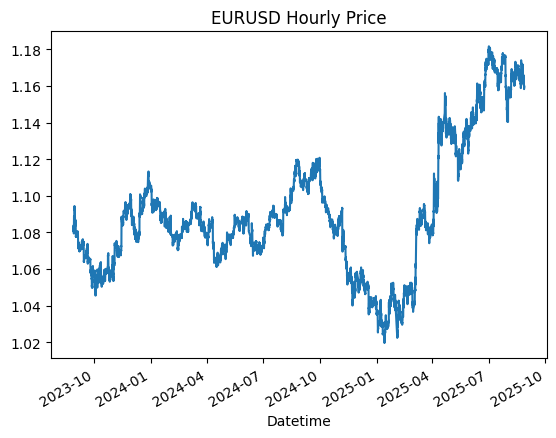

In [9]:
eurusd_df['Close'].plot.line(title='EURUSD Hourly Price')

In [10]:
# generating new fields (using DateTime features):
eurusd_df['Ticker'] = 'EURUSD=X'
eurusd_df['Year'] = eurusd_df.index.year
eurusd_df['Month'] = eurusd_df.index.month
eurusd_df['Weekday'] = eurusd_df.index.weekday
eurusd_df['Date'] = eurusd_df.index.date

# Past and future close prices
eurusd_df['close_minus_1h'] = eurusd_df['Close'].shift(1)   # 1 hour before
eurusd_df['close_plus_1h'] = eurusd_df['Close'].shift(-1)  # 1 hour after

In [11]:
# eurusd_df.tail()

In [12]:
# historical growth for 1h and 4h
eurusd_df['growth_1h'] = eurusd_df['Close'] / eurusd_df['Close'].shift(1)
eurusd_df['growth_4h'] = eurusd_df['Close'] / eurusd_df['Close'].shift(4)

# FUTURE Growth for 1h & 4h
eurusd_df['growth_future_1h'] = eurusd_df['Close'].shift(-1) / eurusd_df['Close']
eurusd_df['growth_future_4h'] = eurusd_df['Close'].shift(-4) / eurusd_df['Close']

# FUTURE Growth: for binary models
eurusd_df['is_positive_growth_1h_future'] = np.where(eurusd_df['growth_future_1h'] > 1, 1, 0)
eurusd_df['is_positive_growth_4h_future'] = np.where(eurusd_df['growth_future_4h'] > 1, 1, 0)

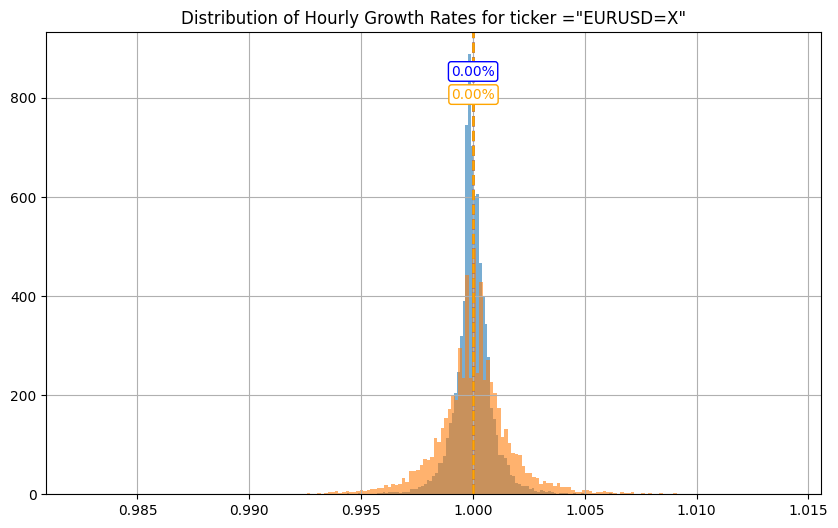

In [13]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Hourly Growth Rates for ticker ="EURUSD=X"')

eurusd_df.growth_1h.hist(bins=200, alpha=0.6, density=True)
eurusd_df.growth_4h.hist(bins=200, alpha=0.6, density=True)

# Add vertical lines for averages
mean_1h = eurusd_df.growth_1h.mean()
mean_4h = eurusd_df.growth_4h.mean()

plt.axvline(mean_1h, color='blue', linestyle='--', linewidth=2, label=f'1h avg = {mean_1h:.3f}')
plt.axvline(mean_4h, color='orange', linestyle='--', linewidth=2, label=f'4h avg = {mean_4h:.3f}')


# Add mean text labels (as percent change)
ymax = plt.ylim()[1]
plt.text(mean_1h, ymax * 0.90,
         f'{(mean_1h - 1) * 100:.2f}%',
         color='blue', ha='center', va='bottom',
         bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.2'))

plt.text(mean_4h, ymax * 0.85,
         f'{(mean_4h - 1) * 100:.2f}%',
         color='orange', ha='center', va='bottom',
         bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.2'))


plt.show()

<Axes: title={'center': 'Distribution of 1-HR Growth Rates for ticker = EURUSD=X'}>

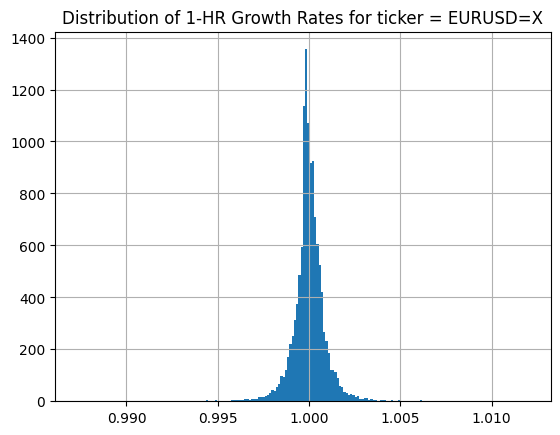

In [14]:
plt.title('Distribution of 1-HR Growth Rates for ticker = EURUSD=X')

eurusd_df.growth_1h.hist(bins=200)

In [15]:
# for modeling: we use growth_1h, growth_4h as feature
COLUMNS = [k for k in eurusd_df.keys() if k.find('growth')>=0 or k=='Close']
eurusd_df[COLUMNS].tail()

Close  growth_1h  growth_4h  growth_future_1h  \
Datetime                                                                      
2025-08-27 11:00:00+01:00  1.158346   0.999073   0.996525          1.000464   
2025-08-27 12:00:00+01:00  1.158883   1.000464   0.998378          1.000116   
2025-08-27 13:00:00+01:00  1.159017   1.000116   0.999768          1.001044   
2025-08-27 14:00:00+01:00  1.160227   1.001044   1.000696          0.999536   
2025-08-27 15:00:00+01:00  1.159689   0.999536   1.001160               NaN   

                           growth_future_4h  is_positive_growth_1h_future  \
Datetime                                                                    
2025-08-27 11:00:00+01:00           1.00116                             1   
2025-08-27 12:00:00+01:00               NaN                             1   
2025-08-27 13:00:00+01:00               NaN                             1   
2025-08-27 14:00:00+01:00               NaN                             0   
2025-08-27 15:00:00+01:00               NaN                             0   

                           is_positive_growth_4h_future  
Datetime                                                 
2025-08-27 11:00:00+01:00                             1  
2025-08-27 12:00:00+01:00                             0  
2025-08-27 13:00:00+01:00                             0  
2025-08-27 14:00:00+01:00                             0  
2025-08-27 15:00:00+01:00                             0

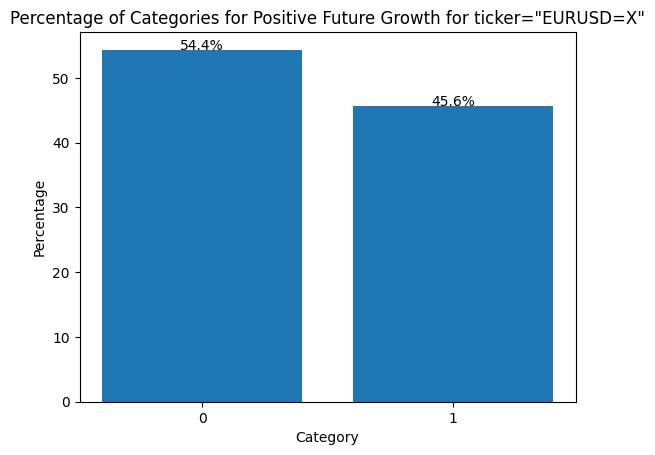

In [16]:
# Calculate value counts
value_counts = eurusd_df['is_positive_growth_1h_future'].value_counts()

# Calculate percentage of each category
percentage = (value_counts / len(eurusd_df)) * 100

# Plot as a bar chart
plt.bar(percentage.index.astype(str), percentage)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Categories for Positive Future Growth for ticker="EURUSD=X"')

# Add percentage values on top of each bar
for i, value in enumerate(percentage):
    plt.text(i, value + 0, f'{value:.1f}%', ha='center')

plt.show()

In [17]:
# Candlestick charts : https://plotly.com/python/candlestick-charts/
fig = go.Figure(data=[go.Candlestick(x=eurusd_df.index,
                open=eurusd_df.Open,
                high=eurusd_df.High,
                low=eurusd_df.Low,
                close=eurusd_df.Close)
               ])

fig.update_layout(
    title="EURUSD hourly candlestick chart",
    title_x=0.5,  # Set title x-position to center
    xaxis_rangeslider_visible=True
    )

fig.show()

Macro Indicators

In [18]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-2, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2025; month= 8; day=27
Period for indexes: 2023-08-27 to 2025-08-27 


* DAX

In [19]:
# DAX Performance Index for EUR-related currency pairs
ticker_obj = yf.Ticker("^GDAXI")
dax_hourly = ticker_obj.history(period = "max", interval = "1h")

In [20]:
for i in [1,4,7,10,15]:
  dax_hourly['growth_dax_'+str(i)+'h'] = dax_hourly['Close'] / dax_hourly['Close'].shift(i)

dax_hourly.tail(2)

Open          High           Low  \
Datetime                                                              
2025-08-27 15:00:00+02:00  24065.820312  24080.189453  24030.669922   
2025-08-27 16:00:00+02:00  24042.800781  24043.169922  24037.779297   

                                  Close  Volume  Dividends  Stock Splits  \
Datetime                                                                   
2025-08-27 15:00:00+02:00  24040.839844       0        0.0           0.0   
2025-08-27 16:00:00+02:00  24040.109375       0        0.0           0.0   

                           growth_dax_1h  growth_dax_4h  growth_dax_7h  \
Datetime                                                                 
2025-08-27 15:00:00+02:00       0.998962       0.996820       0.994262   
2025-08-27 16:00:00+02:00       0.999970       0.996973       0.995725   

                           growth_dax_10h  growth_dax_15h  
Datetime                                                   
2025-08-27 15:00:00+02:00        0.993496        0.995613  
2025-08-27 16:00:00+02:00        0.992227        0.995184

In [21]:
GROWTH_KEYS = [k for k in dax_hourly.keys() if k.startswith('growth')]
dax_hourly_to_merge = dax_hourly[GROWTH_KEYS]
dax_hourly_to_merge.tail(1)

growth_dax_1h  growth_dax_4h  growth_dax_7h  \
Datetime                                                                 
2025-08-27 16:00:00+02:00        0.99997       0.996973       0.995725   

                           growth_dax_10h  growth_dax_15h  
Datetime                                                   
2025-08-27 16:00:00+02:00        0.992227        0.995184

In [22]:
def get_growth_df(df:pd.DataFrame, prefix:str)->pd.DataFrame:
  for i in [1,4,7,10,15]:
    df['growth_'+prefix+'_'+str(i)+'h'] = df['Close'] / df['Close'].shift(i)
    GROWTH_KEYS = [k for k in df.keys() if k.startswith('growth')]
  return df[GROWTH_KEYS]

* S&P500

In [23]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
ticker_obj = yf.Ticker("^GSPC")
snp500_hourly = ticker_obj.history(
                     period = "max",
                     interval = "1h")

snp500_to_merge = get_growth_df(snp500_hourly,'snp500')
snp500_to_merge.tail(2)

growth_snp500_1h  growth_snp500_4h  \
Datetime                                                        
2025-08-26 15:30:00-04:00          1.001025          1.002897   
2025-08-27 09:30:00-04:00          1.001177          1.003849   

                           growth_snp500_7h  growth_snp500_10h  \
Datetime                                                         
2025-08-26 15:30:00-04:00          1.004076           1.000834   
2025-08-27 09:30:00-04:00          1.004416           1.002717   

                           growth_snp500_15h  
Datetime                                      
2025-08-26 15:30:00-04:00           1.000142  
2025-08-27 09:30:00-04:00           1.001076

* DOW JONES

In [24]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch

ticker_obj = yf.Ticker("^DJI")
dji_hourly = ticker_obj.history(
                     period = "max",
                     interval = "1h")

dji_hourly_to_merge = get_growth_df(dji_hourly,'dji')
dji_hourly_to_merge.tail(2)

growth_dji_1h  growth_dji_4h  growth_dji_7h  \
Datetime                                                                 
2025-08-26 15:30:00-04:00       1.000510       1.002911       1.002977   
2025-08-27 09:30:00-04:00       1.002451       1.004771       1.005423   

                           growth_dji_10h  growth_dji_15h  
Datetime                                                   
2025-08-26 15:30:00-04:00        1.000625        0.995576  
2025-08-27 09:30:00-04:00        1.003855        0.997837

* GDP

In [25]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT

gdppot = pdr.DataReader("GDPPOT", "fred", start=start)
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
# gdppot.tail(2)

gdppot_to_merge = gdppot[['gdppot_us_yoy','gdppot_us_qoq']]
gdppot_to_merge.tail(1)

gdppot_us_yoy  gdppot_us_qoq
DATE                                    
2025-07-01       0.023013       0.005737

* CONSUMER PRICE INDEX (CPI)

In [26]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.

cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

#cpilfesl.tail(2)

cpilfesl_to_merge = cpilfesl[['cpi_core_yoy','cpi_core_mom']]
cpilfesl_to_merge.tail(2)

cpi_core_yoy  cpi_core_mom
DATE                                  
2025-06-01      0.029079      0.002282
2025-07-01      0.030486      0.003223

* TRADE BALANCE

In [ ]:
# https://fred.stlouisfed.org/series/BOPGSTB

trade_balance = pdr.DataReader("BOPGSTB", "fred", start=start)
trade_balance['trade_balance_us_yoy'] = trade_balance.BOPGSTB/trade_balance.BOPGSTB.shift(12)-1
trade_balance['trade_balance_us_mom'] = trade_balance.BOPGSTB/trade_balance.BOPGSTB.shift(1)-1

trade_balance_to_merge = trade_balance[['trade_balance_us_yoy','trade_balance_us_mom']]
trade_balance_to_merge.tail(2)

trade_balance_us_yoy  trade_balance_us_mom
DATE                                                  
2025-05-01             -0.037499              0.189306
2025-06-01             -0.185609             -0.160290

* FEDFUNDS

In [28]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS

fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(2)

FEDFUNDS
DATE                
2025-06-01      4.33
2025-07-01      4.33

* DGS1

In [29]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail(2)

DGS1
DATE            
2025-08-22  3.87
2025-08-25  3.88

* DGS5

In [30]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail(2)

DGS5
DATE            
2025-08-22  3.76
2025-08-25  3.80

* DGS10

In [31]:
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail(2)

DGS10
DATE             
2025-08-22   4.26
2025-08-25   4.28

* VOLATILITY INDEX

In [32]:
# https://finance.yahoo.com/quote/%5EVIX/

ticker_obj = yf.Ticker("^VIX")
vix = ticker_obj.history(
                     period = "max",
                     interval = "1h")

# vix.tail(2)

vix_to_merge = vix['Close']
vix_to_merge.tail(2)

Datetime
2025-08-27 08:00:00-05:00    14.93
2025-08-27 09:00:00-05:00    14.93
Name: Close, dtype: float64

In [33]:
# Dynamic visualisation of VIX prices
fig = px.line(vix,
              x=vix.index,
              y="Close",
              title='VIX over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

* GOLD

In [34]:
# WEB: https://finance.yahoo.com/quote/GC%3DF

ticker_obj = yf.Ticker("GC=F")
gold = ticker_obj.history(
                     period = "max",
                     interval = "1h")

# gold.tail(1)

gold_to_merge = get_growth_df(gold,'gold')
gold_to_merge.tail(2)

growth_gold_1h  growth_gold_4h  growth_gold_7h  \
Datetime                                                                    
2025-08-27 09:00:00-04:00        0.998980        0.999796        0.999679   
2025-08-27 10:00:00-04:00        0.999621        1.000088        0.998368   

                           growth_gold_10h  growth_gold_15h  
Datetime                                                     
2025-08-27 09:00:00-04:00         0.998601         0.995844  
2025-08-27 10:00:00-04:00         0.999679         0.995408

In [35]:
# Dynamic visualisation of GOLD prices
fig = px.line(gold,
              x=gold.index,
              y="Close",
              title='GOLD over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

* WTI Crude and Brent Oil

In [36]:
# WEB: https://uk.finance.yahoo.com/quote/CL=F/

ticker_obj = yf.Ticker("CL=F")
crude_oil = ticker_obj.history(
                     period = "max",
                     interval = "1h")

# crude_oil.tail(2)

crude_oil_to_merge = get_growth_df(crude_oil,'wti_oil')
crude_oil_to_merge.tail(2)

growth_wti_oil_1h  growth_wti_oil_4h  \
Datetime                                                          
2025-08-27 09:00:00-04:00           1.000471           1.007119   
2025-08-27 10:00:00-04:00           0.999372           1.007443   

                           growth_wti_oil_7h  growth_wti_oil_10h  \
Datetime                                                           
2025-08-27 09:00:00-04:00           1.007278            1.006005   
2025-08-27 10:00:00-04:00           1.006646            1.005850   

                           growth_wti_oil_15h  
Datetime                                       
2025-08-27 09:00:00-04:00            1.003626  
2025-08-27 10:00:00-04:00            1.003154

In [37]:
# Dynamic visualisation
fig = px.line(crude_oil,
              x=crude_oil.index,
              y="Close",
              title='WTI Crude Oil over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

In [38]:
# Brent Oil
# WEB: https://uk.finance.yahoo.com/quote/BZ=F/

ticker_obj = yf.Ticker("BZ=F")
brent_oil = ticker_obj.history(
                     period = "max",
                     interval = "1h")

#brent_oil.tail(2)

brent_oil_to_merge = get_growth_df(brent_oil,'brent_oil')
brent_oil_to_merge.tail(2)

growth_brent_oil_1h  growth_brent_oil_4h  \
Datetime                                                              
2025-08-27 09:00:00-04:00             1.000448             1.005853   
2025-08-27 10:00:00-04:00             0.999851             1.006610   

                           growth_brent_oil_7h  growth_brent_oil_10h  \
Datetime                                                               
2025-08-27 09:00:00-04:00             1.005853              1.004647   
2025-08-27 10:00:00-04:00             1.005854              1.004497   

                           growth_brent_oil_15h  
Datetime                                         
2025-08-27 09:00:00-04:00              1.002843  
2025-08-27 10:00:00-04:00              1.002244

In [39]:
# Dynamic visualisation
fig = px.line(brent_oil,
              x=brent_oil.index,
              y="Close",
              title='Brent Oil over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

* Bitcoin prices: BTC_USD

In [40]:
# https://finance.yahoo.com/quote/BTC-USD/

ticker_obj = yf.Ticker("BTC-USD")
btc_usd =  ticker_obj.history(
                     period = "max",
                     interval = "1h")

#btc_usd.tail(2)

btc_usd_to_merge = get_growth_df(btc_usd,'btc_usd')
btc_usd_to_merge.tail(2)

growth_btc_usd_1h  growth_btc_usd_4h  \
Datetime                                                          
2025-08-27 13:00:00+00:00           1.001348           1.005994   
2025-08-27 14:00:00+00:00           1.001948           1.006316   

                           growth_btc_usd_7h  growth_btc_usd_10h  \
Datetime                                                           
2025-08-27 13:00:00+00:00           1.004015            1.000049   
2025-08-27 14:00:00+00:00           1.009298            1.000799   

                           growth_btc_usd_15h  
Datetime                                       
2025-08-27 13:00:00+00:00            0.996156  
2025-08-27 14:00:00+00:00            0.999080

In [41]:
# Dynamic visualisation
fig = px.line(btc_usd,
              x=btc_usd.index,
              y="Close",
              title='Bitcoin price daily')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

#### Hourly OHCLV data for a set of Currency Pairs

In [42]:
currency_tickers = df['Symbol'].to_list()

In [43]:
forex_df = pd.DataFrame({'A' : []})

for i,ticker in enumerate(currency_tickers, 1):
  print(i,ticker)

  ticker_obj = yf.Ticker(ticker)
  historyPrices = ticker_obj.history(
                     period = "max",
                     interval = "1h")

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  for i in [1,4,7,10,15]:
    historyPrices['growth_'+str(i)+'h'] = historyPrices['Close'] / historyPrices['Close'].shift(i)

  # future returns
  historyPrices['growth_future_1h'] = historyPrices['Close'].shift(-1) / historyPrices['Close']
  #historyPrices['growth_future_4h'] = historyPrices['Close'].shift(-4) / historyPrices['Close']

  # Technical indicators
  # SimpleMovingAverage 10 days and 20 days
  historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  historyPrices['volatility'] =   historyPrices['growth_1h'].rolling(30).std() * np.sqrt(252*24)

  # what we want to predict
  historyPrices['is_positive_growth_1h_future'] = np.where(historyPrices['growth_future_1h'] > 1, 1, 0)
  #historyPrices['is_positive_growth_4h_future'] = np.where(historyPrices['growth_future_4h'] > 1, 1, 0)

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)

  if forex_df.empty:
    forex_df = historyPrices
  else:
    forex_df = pd.concat([forex_df, historyPrices], ignore_index=True)

1 EURUSD=X
2 JPY=X
3 GBPUSD=X
4 AUDUSD=X
5 NZDUSD=X
6 EURJPY=X
7 GBPJPY=X
8 EURGBP=X
9 EURCAD=X
10 EURSEK=X
11 EURCHF=X
12 EURHUF=X
13 CNY=X
14 HKD=X
15 SGD=X
16 INR=X
17 MXN=X
18 PHP=X
19 IDR=X
20 THB=X
21 MYR=X
22 ZAR=X
23 RUB=X


In [44]:
# unique tickers
forex_df.Ticker.nunique()

23

In [45]:
# count of observations by currency pairs
forex_df.Ticker.value_counts()

Ticker
HKD=X       12454
AUDUSD=X    12429
NZDUSD=X    12421
ZAR=X       12409
MXN=X       12383
EURCAD=X    12370
EURGBP=X    12366
EURCHF=X    12365
EURJPY=X    12364
GBPJPY=X    12363
EURUSD=X    12360
EURSEK=X    12360
GBPUSD=X    12360
EURHUF=X    12360
SGD=X       12358
THB=X       12292
JPY=X       12291
INR=X       10354
PHP=X        9872
RUB=X        9775
CNY=X        9273
MYR=X        7966
IDR=X        7503
Name: count, dtype: int64

In [46]:
# min and max date of each currency pair
forex_df.groupby('Ticker').Date.agg(['min','max'])

min         max
Ticker                          
AUDUSD=X  2023-08-28  2025-08-27
CNY=X     2023-08-28  2025-08-27
EURCAD=X  2023-08-28  2025-08-27
EURCHF=X  2023-08-28  2025-08-27
EURGBP=X  2023-08-28  2025-08-27
EURHUF=X  2023-08-28  2025-08-27
EURJPY=X  2023-08-28  2025-08-27
EURSEK=X  2023-08-28  2025-08-27
EURUSD=X  2023-08-28  2025-08-27
GBPJPY=X  2023-08-28  2025-08-27
GBPUSD=X  2023-08-28  2025-08-27
HKD=X     2023-08-28  2025-08-27
IDR=X     2023-08-28  2025-08-27
INR=X     2023-08-28  2025-08-27
JPY=X     2023-08-28  2025-08-27
MXN=X     2023-08-28  2025-08-27
MYR=X     2023-08-28  2025-08-27
NZDUSD=X  2023-08-28  2025-08-27
PHP=X     2023-08-28  2025-08-27
RUB=X     2023-08-28  2025-08-27
SGD=X     2023-08-28  2025-08-27
THB=X     2023-08-28  2025-08-27
ZAR=X     2023-08-28  2025-08-27

In [47]:
# average growth_1hr
forex_df.groupby(by=['Year', 'Ticker']).growth_1h.mean()

Year  Ticker  
2023  AUDUSD=X    1.000029
      CNY=X       0.999984
      EURCAD=X    0.999998
      EURCHF=X    0.999987
      EURGBP=X    1.000004
                    ...   
2025  PHP=X       0.999997
      RUB=X       0.999898
      SGD=X       0.999986
      THB=X       0.999987
      ZAR=X       0.999987
Name: growth_1h, Length: 69, dtype: float64

In [48]:
forex_df['Date'] = pd.to_datetime(forex_df['Date'])

In [49]:
forex_df.shape

(265048, 24)

#### Technical Indicators with TA-lib

In [50]:
# https://medium.com/@Tobi_Lux/collaboration-of-colab-yfinance-and-ta-lib-recent-issues-6cd8eebb56b0
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
!pip install conda-package-handling
!wget https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
!cph x ta-lib-0.5.1-py311h9ecbd09_0.conda

# 🛠 Option 1: Remove the existing directory first (clean, but destructive)
!rm -rf /usr/local/lib/python3.11/dist-packages/talib

!mv ./ta-lib-0.5.1-py311h9ecbd09_0/lib/python3.11/site-packages/talib /usr/local/lib/python3.11/dist-packages/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4055    0  4055    0     0  13859      0 --:--:-- --:--:-- --:--:-- 13886
100  517k  100  517k    0     0   724k      0 --:--:-- --:--:-- --:--:--  724k
--2025-08-27 14:17:00--  https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
Resolving anaconda.org (anaconda.org)... 104.19.144.37, 104.19.145.37, 2606:4700::6813:9025, ...
Connecting to anaconda.org (anaconda.org)|104.19.144.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5f738b4b78d4370a69f82984/673b62920c609ff6945bb24d?response-content-disposition=attachment%3B%20filename%3D%22ta-lib-0.5.1-py311h9ecbd09_0.conda%22%3B%20filename%2A%3DUTF-8%27%27ta-lib-0.5.1-py311h9ecbd09_0.conda&response-content-type=application%2Foctet-stream&X-Amz-Algorithm=

In [51]:
import talib
print(talib.get_functions())  # Show available TA-Lib functions

['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE', 'ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM', 'ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH', 'ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR', 'BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR',

* Momentum Indicators (https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/momentum_indicators.md)

In [52]:
def talib_get_momentum_indicators_for_one_ticker(df: pd.DataFrame) -> pd.DataFrame:
  # ADX - Average Directional Movement Index
  talib_momentum_adx = talib.ADX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # ADXR - Average Directional Movement Index Rating
  talib_momentum_adxr = talib.ADXR(df.High.values, df.Low.values, df.Close.values, timeperiod=14 )
  # APO - Absolute Price Oscillator
  talib_momentum_apo = talib.APO(df.Close.values, fastperiod=12, slowperiod=26, matype=0 )
  # AROON - Aroon
  talib_momentum_aroon = talib.AROON(df.High.values, df.Low.values, timeperiod=14 )
  # talib_momentum_aroon[0].size
  # talib_momentum_aroon[1].size
  # AROONOSC - Aroon Oscillator
  talib_momentum_aroonosc = talib.AROONOSC(df.High.values, df.Low.values, timeperiod=14)
  # BOP - Balance of Power
  # https://school.stockcharts.com/doku.php?id=technical_indicators:balance_of_power
     #calculate open prices as shifted closed prices from the prev day
     # open = df.Last.shift(1)
  talib_momentum_bop = talib.BOP(df.Open.values, df.High.values, df.Low.values, df.Close.values)
  # CCI - Commodity Channel Index
  talib_momentum_cci = talib.CCI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # CMO - Chande Momentum Oscillator
  talib_momentum_cmo = talib.CMO(df.Close.values, timeperiod=14)
  # DX - Directional Movement Index
  talib_momentum_dx = talib.DX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # MACD - Moving Average Convergence/Divergence
  talib_momentum_macd, talib_momentum_macdsignal, talib_momentum_macdhist = talib.MACD(df.Close.values, fastperiod=12, \
                                                                                       slowperiod=26, signalperiod=9)
  # MACDEXT - MACD with controllable MA type
  talib_momentum_macd_ext, talib_momentum_macdsignal_ext, talib_momentum_macdhist_ext = talib.MACDEXT(df.Close.values, \
                                                                                                    fastperiod=12, \
                                                                                                    fastmatype=0, \
                                                                                                    slowperiod=26, \
                                                                                                    slowmatype=0, \
                                                                                                    signalperiod=9, \
                                                                                                  signalmatype=0)
  # MACDFIX - Moving Average Convergence/Divergence Fix 12/26
  talib_momentum_macd_fix, talib_momentum_macdsignal_fix, talib_momentum_macdhist_fix = talib.MACDFIX(df.Close.values, \
                                                                                                      signalperiod=9)
  # MFI - Money Flow Index
  talib_momentum_mfi = talib.MFI(df.High.values, df.Low.values, df.Close.values, df.Volume.values, timeperiod=14)
  # MINUS_DI - Minus Directional Indicator
  talib_momentum_minus_di = talib.MINUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # MOM - Momentum
  talib_momentum_mom = talib.MOM(df.Close.values, timeperiod=10)
  # PLUS_DI - Plus Directional Indicator
  talib_momentum_plus_di = talib.PLUS_DI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # PLUS_DM - Plus Directional Movement
  talib_momentum_plus_dm = talib.PLUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # PPO - Percentage Price Oscillator
  talib_momentum_ppo = talib.PPO(df.Close.values, fastperiod=12, slowperiod=26, matype=0)
  # ROC - Rate of change : ((price/prevPrice)-1)*100
  talib_momentum_roc = talib.ROC(df.Close.values, timeperiod=10)
  # ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
  talib_momentum_rocp = talib.ROCP(df.Close.values, timeperiod=10)
  # ROCR - Rate of change ratio: (price/prevPrice)
  talib_momentum_rocr = talib.ROCR(df.Close.values, timeperiod=10)
  # ROCR100 - Rate of change ratio 100 scale: (price/prevPrice)*100
  talib_momentum_rocr100 = talib.ROCR100(df.Close.values, timeperiod=10)
  # RSI - Relative Strength Index
  talib_momentum_rsi = talib.RSI(df.Close.values, timeperiod=14)
  # STOCH - Stochastic
  talib_momentum_slowk, talib_momentum_slowd = talib.STOCH(df.High.values, df.Low.values, df.Close.values, \
                                                           fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
  # STOCHF - Stochastic Fast
  talib_momentum_fastk, talib_momentum_fastd = talib.STOCHF(df.High.values, df.Low.values, df.Close.values, \
                                                            fastk_period=5, fastd_period=3, fastd_matype=0)
  # STOCHRSI - Stochastic Relative Strength Index
  talib_momentum_fastk_rsi, talib_momentum_fastd_rsi = talib.STOCHRSI(df.Close.values, timeperiod=14, \
                                                                      fastk_period=5, fastd_period=3, fastd_matype=0)
  # TRIX - 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
  talib_momentum_trix = talib.TRIX(df.Close.values, timeperiod=30)
  # ULTOSC - Ultimate Oscillator
  talib_momentum_ultosc = talib.ULTOSC(df.High.values, df.Low.values, df.Close.values, timeperiod1=7, timeperiod2=14, timeperiod3=28)
  # WILLR - Williams' %R
  talib_momentum_willr = talib.WILLR(df.High.values, df.Low.values, df.Close.values, timeperiod=14)

  momentum_df =   pd.DataFrame(
    {
      # assume here multi-index
      # 'datetime': df.index.get_level_values(0),
      # 'ticker': df.index.get_level_values(1) ,

      # old way with separate columns
      'Date': df.Date.values,
      'Ticker': df.Ticker,

      'adx': talib_momentum_adx,
      'adxr': talib_momentum_adxr,
      'apo': talib_momentum_apo,
      'aroon_1': talib_momentum_aroon[0] ,
      'aroon_2': talib_momentum_aroon[1],
      'aroonosc': talib_momentum_aroonosc,
      'bop': talib_momentum_bop,
      'cci': talib_momentum_cci,
      'cmo': talib_momentum_cmo,
      'dx': talib_momentum_dx,
      'macd': talib_momentum_macd,
      'macdsignal': talib_momentum_macdsignal,
      'macdhist': talib_momentum_macdhist,
      'macd_ext': talib_momentum_macd_ext,
      'macdsignal_ext': talib_momentum_macdsignal_ext,
      'macdhist_ext': talib_momentum_macdhist_ext,
      'macd_fix': talib_momentum_macd_fix,
      'macdsignal_fix': talib_momentum_macdsignal_fix,
      'macdhist_fix': talib_momentum_macdhist_fix,
      'mfi': talib_momentum_mfi,
      'minus_di': talib_momentum_minus_di,
      'mom': talib_momentum_mom,
      'plus_di': talib_momentum_plus_di,
      'dm': talib_momentum_plus_dm,
      'ppo': talib_momentum_ppo,
      'roc': talib_momentum_roc,
      'rocp': talib_momentum_rocp,
      'rocr': talib_momentum_rocr,
      'rocr100': talib_momentum_rocr100,
      'rsi': talib_momentum_rsi,
      'slowk': talib_momentum_slowk,
      'slowd': talib_momentum_slowd,
      'fastk': talib_momentum_fastk,
      'fastd': talib_momentum_fastd,
      'fastk_rsi': talib_momentum_fastk_rsi,
      'fastd_rsi': talib_momentum_fastd_rsi,
      'trix': talib_momentum_trix,
      'ultosc': talib_momentum_ultosc,
      'willr': talib_momentum_willr,
     }
  )
  return momentum_df

* Volume, Volatility, Cycle, Price indicators (https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md)

In [53]:
def talib_get_volume_volatility_cycle_price_indicators(df: pd.DataFrame) -> pd.DataFrame:
        # TA-Lib Volume indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md
        # AD - Chaikin A/D Line
        talib_ad = talib.AD(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values)
        # ADOSC - Chaikin A/D Oscillator
        talib_adosc = talib.ADOSC(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values, fastperiod=3, slowperiod=10)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Volatility indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volatility_indicators.md
        # ATR - Average True Range
        talib_atr = talib.ATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # NATR - Normalized Average True Range
        talib_natr = talib.NATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Cycle Indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/cycle_indicators.md
        # HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
        talib_ht_dcperiod = talib.HT_DCPERIOD(df.Close.values)
        # HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
        talib_ht_dcphase = talib.HT_DCPHASE(df.Close.values)
        # HT_PHASOR - Hilbert Transform - Phasor Components
        talib_ht_phasor_inphase, talib_ht_phasor_quadrature = talib.HT_PHASOR(
            df.Close.values)
        # HT_SINE - Hilbert Transform - SineWave
        talib_ht_sine_sine, talib_ht_sine_leadsine = talib.HT_SINE(
            df.Close.values)
        # HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode
        talib_ht_trendmode = talib.HT_TRENDMODE(df.Close.values)

        # TA-Lib Price Transform Functions
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/price_transform.md
        # AVGPRICE - Average Price
        talib_avgprice = talib.AVGPRICE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # MEDPRICE - Median Price
        talib_medprice = talib.MEDPRICE(df.High.values, df.Low.values)
        # TYPPRICE - Typical Price
        talib_typprice = talib.TYPPRICE(
            df.High.values, df.Low.values, df.Close.values)
        # WCLPRICE - Weighted Close Price
        talib_wclprice = talib.WCLPRICE(
            df.High.values, df.Low.values, df.Close.values)

        volume_volatility_cycle_price_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Volume indicators
             'ad': talib_ad,
             'adosc': talib_adosc,
             'obv': talib_obv,
             # TA-Lib Volatility indicators
             'atr': talib_atr,
             'natr': talib_natr,
             'obv': talib_obv,
             # TA-Lib Cycle Indicators
             'ht_dcperiod': talib_ht_dcperiod,
             'ht_dcphase': talib_ht_dcphase,
             'ht_phasor_inphase': talib_ht_phasor_inphase,
             'ht_phasor_quadrature': talib_ht_phasor_quadrature,
             'ht_sine_sine': talib_ht_sine_sine,
             'ht_sine_leadsine': talib_ht_sine_leadsine,
             'ht_trendmod': talib_ht_trendmode,
             # TA-Lib Price Transform Functions
             'avgprice': talib_avgprice,
             'medprice': talib_medprice,
             'typprice': talib_typprice,
             'wclprice': talib_wclprice,
             }
        )

        # Need a proper date type
        volume_volatility_cycle_price_df['Date'] = pd.to_datetime(
            volume_volatility_cycle_price_df['Date'])

        return volume_volatility_cycle_price_df

* Pattern indicators (https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md)

In [54]:
def talib_get_pattern_recognition_indicators(df: pd.DataFrame) -> pd.DataFrame:
# TA-Lib Pattern Recognition indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md
        # Nice article about candles (pattern recognition) https://medium.com/analytics-vidhya/recognizing-over-50-candlestick-patterns-with-python-4f02a1822cb5

        # CDL2CROWS - Two Crows
        talib_cdl2crows = talib.CDL2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3BLACKCROWS - Three Black Crows
        talib_cdl3blackrows = talib.CDL3BLACKCROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3INSIDE - Three Inside Up/Down
        talib_cdl3inside = talib.CDL3INSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3LINESTRIKE - Three-Line Strike
        talib_cdl3linestrike = talib.CDL3LINESTRIKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3OUTSIDE - Three Outside Up/Down
        talib_cdl3outside = talib.CDL3OUTSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3STARSINSOUTH - Three Stars In The South
        talib_cdl3starsinsouth = talib.CDL3STARSINSOUTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3WHITESOLDIERS - Three Advancing White Soldiers
        talib_cdl3whitesoldiers = talib.CDL3WHITESOLDIERS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLABANDONEDBABY - Abandoned Baby
        talib_cdlabandonedbaby = talib.CDLABANDONEDBABY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLADVANCEBLOCK - Advance Block
        talib_cdladvancedblock = talib.CDLADVANCEBLOCK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBELTHOLD - Belt-hold
        talib_cdlbelthold = talib.CDLBELTHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBREAKAWAY - Breakaway
        talib_cdlbreakaway = talib.CDLBREAKAWAY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCLOSINGMARUBOZU - Closing Marubozu
        talib_cdlclosingmarubozu = talib.CDLCLOSINGMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCONCEALBABYSWALL - Concealing Baby Swallow
        talib_cdlconcealbabyswall = talib.CDLCONCEALBABYSWALL(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCOUNTERATTACK - Counterattack
        talib_cdlcounterattack = talib.CDLCOUNTERATTACK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDARKCLOUDCOVER - Dark Cloud Cover
        talib_cdldarkcloudcover = talib.CDLDARKCLOUDCOVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLDOJI - Doji
        talib_cdldoji = talib.CDLDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDOJISTAR - Doji Star
        talib_cdldojistar = talib.CDLDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDRAGONFLYDOJI - Dragonfly Doji
        talib_cdldragonflydoji = talib.CDLDRAGONFLYDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLENGULFING - Engulfing Pattern
        talib_cdlengulfing = talib.CDLENGULFING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLEVENINGDOJISTAR - Evening Doji Star
        talib_cdleveningdojistar = talib.CDLEVENINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLEVENINGSTAR - Evening Star
        talib_cdleveningstar = talib.CDLEVENINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines
        talib_cdlgapsidesidewhite = talib.CDLGAPSIDESIDEWHITE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLGRAVESTONEDOJI - Gravestone Doji
        talib_cdlgravestonedoji = talib.CDLGRAVESTONEDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHAMMER - Hammer
        talib_cdlhammer = talib.CDLHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHANGINGMAN - Hanging Man
        talib_cdlhangingman = talib.CDLHANGINGMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMI - Harami Pattern
        talib_cdlharami = talib.CDLHARAMI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMICROSS - Harami Cross Pattern
        talib_cdlharamicross = talib.CDLHARAMICROSS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIGHWAVE - High-Wave Candle
        talib_cdlhighwave = talib.CDLHIGHWAVE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKE - Hikkake Pattern
        talib_cdlhikkake = talib.CDLHIKKAKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKEMOD - Modified Hikkake Pattern
        talib_cdlhikkakemod = talib.CDLHIKKAKEMOD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLHOMINGPIGEON - Homing Pigeon
        talib_cdlhomingpigeon = talib.CDLHOMINGPIGEON(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLIDENTICAL3CROWS - Identical Three Crows
        talib_cdlidentical3crows = talib.CDLIDENTICAL3CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINNECK - In-Neck Pattern
        talib_cdlinneck = talib.CDLINNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINVERTEDHAMMER - Inverted Hammer
        talib_cdlinvertedhammer = talib.CDLINVERTEDHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKING - Kicking
        talib_cdlkicking = talib.CDLKICKING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu
        talib_cdlkickingbylength = talib.CDLKICKINGBYLENGTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLADDERBOTTOM - Ladder Bottom
        talib_cdlladderbottom = talib.CDLLADDERBOTTOM(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLEGGEDDOJI - Long Legged Doji
        talib_cdllongleggeddoji = talib.CDLLONGLEGGEDDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLINE - Long Line Candle
        talib_cdllongline = talib.CDLLONGLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMARUBOZU - Marubozu
        talib_cdlmarubozu = talib.CDLMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMATCHINGLOW - Matching Low
        talib_cdlmatchinglow = talib.CDLMATCHINGLOW(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLMATHOLD - Mat Hold
        talib_cdlmathold = talib.CDLMATHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGDOJISTAR - Morning Doji Star
        talib_cdlmorningdojistar = talib.CDLMORNINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGSTAR - Morning Star
        talib_cdlmorningstar = talib.CDLMORNINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLONNECK - On-Neck Pattern
        talib_cdlonneck = talib.CDLONNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLPIERCING - Piercing Pattern
        talib_cdlpiercing = talib.CDLPIERCING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRICKSHAWMAN - Rickshaw Man
        talib_cdlrickshawman = talib.CDLRICKSHAWMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRISEFALL3METHODS - Rising/Falling Three Methods
        talib_cdlrisefall3methods = talib.CDLRISEFALL3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSEPARATINGLINES - Separating Lines
        talib_cdlseparatinglines = talib.CDLSEPARATINGLINES(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHOOTINGSTAR - Shooting Star
        talib_cdlshootingstar = talib.CDLSHOOTINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHORTLINE - Short Line Candle
        talib_cdlshortline = talib.CDLSHORTLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSPINNINGTOP - Spinning Top
        talib_cdlspinningtop = talib.CDLSPINNINGTOP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLSTALLEDPATTERN - Stalled Pattern
        talib_cdlstalledpattern = talib.CDLSTALLEDPATTERN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSTICKSANDWICH - Stick Sandwich
        talib_cdlsticksandwich = talib.CDLSTICKSANDWICH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)
        talib_cdltakuru = talib.CDLTAKURI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTASUKIGAP - Tasuki Gap
        talib_cdltasukigap = talib.CDLTASUKIGAP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTHRUSTING - Thrusting Pattern
        talib_cdlthrusting = talib.CDLTHRUSTING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTRISTAR - Tristar Pattern
        talib_cdltristar = talib.CDLTRISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUNIQUE3RIVER - Unique 3 River
        talib_cdlunique3river = talib.CDLUNIQUE3RIVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUPSIDEGAP2CROWS - Upside Gap Two Crows
        talib_cdlupsidegap2crows = talib.CDLUPSIDEGAP2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Methods
        talib_cdlxsidegap3methods = talib.CDLXSIDEGAP3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        pattern_indicators_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Pattern Recognition indicators
             'cdl2crows': talib_cdl2crows,
             'cdl3blackrows': talib_cdl3blackrows,
             'cdl3inside': talib_cdl3inside,
             'cdl3linestrike': talib_cdl3linestrike,
             'cdl3outside': talib_cdl3outside,
             'cdl3starsinsouth': talib_cdl3starsinsouth,
             'cdl3whitesoldiers': talib_cdl3whitesoldiers,
             'cdlabandonedbaby': talib_cdlabandonedbaby,
             'cdladvancedblock': talib_cdladvancedblock,
             'cdlbelthold': talib_cdlbelthold,
             'cdlbreakaway': talib_cdlbreakaway,
             'cdlclosingmarubozu': talib_cdlclosingmarubozu,
             'cdlconcealbabyswall': talib_cdlconcealbabyswall,
             'cdlcounterattack': talib_cdlcounterattack,
             'cdldarkcloudcover': talib_cdldarkcloudcover,
             'cdldoji': talib_cdldoji,
             'cdldojistar': talib_cdldojistar,
             'cdldragonflydoji': talib_cdldragonflydoji,
             'cdlengulfing': talib_cdlengulfing,
             'cdleveningdojistar': talib_cdleveningdojistar,
             'cdleveningstar': talib_cdleveningstar,
             'cdlgapsidesidewhite': talib_cdlgapsidesidewhite,
             'cdlgravestonedoji': talib_cdlgravestonedoji,
             'cdlhammer': talib_cdlhammer,
             'cdlhangingman': talib_cdlhangingman,
             'cdlharami': talib_cdlharami,
             'cdlharamicross': talib_cdlharamicross,
             'cdlhighwave': talib_cdlhighwave,
             'cdlhikkake': talib_cdlhikkake,
             'cdlhikkakemod': talib_cdlhikkakemod,
             'cdlhomingpigeon': talib_cdlhomingpigeon,
             'cdlidentical3crows': talib_cdlidentical3crows,
             'cdlinneck': talib_cdlinneck,
             'cdlinvertedhammer': talib_cdlinvertedhammer,
             'cdlkicking': talib_cdlkicking,
             'cdlkickingbylength': talib_cdlkickingbylength,
             'cdlladderbottom': talib_cdlladderbottom,
             'cdllongleggeddoji': talib_cdllongleggeddoji,
             'cdllongline': talib_cdllongline,
             'cdlmarubozu': talib_cdlmarubozu,
             'cdlmatchinglow': talib_cdlmatchinglow,
             'cdlmathold': talib_cdlmathold,
             'cdlmorningdojistar': talib_cdlmorningdojistar,
             'cdlmorningstar': talib_cdlmorningstar,
             'cdlonneck': talib_cdlonneck,
             'cdlpiercing': talib_cdlpiercing,
             'cdlrickshawman': talib_cdlrickshawman,
             'cdlrisefall3methods': talib_cdlrisefall3methods,
             'cdlseparatinglines': talib_cdlseparatinglines,
             'cdlshootingstar': talib_cdlshootingstar,
             'cdlshortline': talib_cdlshortline,
             'cdlspinningtop': talib_cdlspinningtop,
             'cdlstalledpattern': talib_cdlstalledpattern,
             'cdlsticksandwich': talib_cdlsticksandwich,
             'cdltakuru': talib_cdltakuru,
             'cdltasukigap': talib_cdltasukigap,
             'cdlthrusting': talib_cdlthrusting,
             'cdltristar': talib_cdltristar,
             'cdlunique3river': talib_cdlunique3river,
             'cdlupsidegap2crows': talib_cdlupsidegap2crows,
             'cdlxsidegap3methods': talib_cdlxsidegap3methods
             }
        )

        # Need a proper date type
        pattern_indicators_df['Date'] = pd.to_datetime(
            pattern_indicators_df['Date'])

        return pattern_indicators_df

#### Calculate Tech Indicators and Merge to the original dataframe

In [55]:
# Volume needs to be float, not int
forex_df['Volume'] = forex_df['Volume']*1.0

In [56]:
# https://stackoverflow.com/questions/51712269/how-to-run-ta-lib-on-multiple-columns-of-a-pandas-dataframe
for f in ['Open','High','Low','Close', 'Volume', 'Close']:
  forex_df.loc[:,f] = forex_df.loc[:,f].astype('float64')

In [57]:
forex_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265048 entries, 0 to 265047
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Open                          265048 non-null  float64       
 1   High                          265048 non-null  float64       
 2   Low                           265048 non-null  float64       
 3   Close                         265048 non-null  float64       
 4   Volume                        265048 non-null  float64       
 5   Dividends                     265048 non-null  float64       
 6   Stock Splits                  265048 non-null  float64       
 7   Ticker                        265048 non-null  object        
 8   Year                          265048 non-null  int32         
 9   Month                         265048 non-null  int32         
 10  Weekday                       265048 non-null  int32         
 11  Date         

In [58]:
# supress warnings
pd.options.mode.chained_assignment = None  # default='warn'

# adding Momentum / Pattern/ Volume features to all tickers - one by one
merged_df_with_tech_ind = pd.DataFrame({'A' : []})

for i, ticker in enumerate(currency_tickers, 1):
    print(f'{i}/{len(currency_tickers)} Current ticker is {ticker}')

    current_ticker_data = forex_df[forex_df.Ticker == ticker].copy()  # current_ticker_data = forex_df[forex_df.Ticker.isin([ticker])]
    current_ticker_data['Date'] = pd.to_datetime(current_ticker_data['Date'], utc=True)
    current_ticker_data["Ticker"] = current_ticker_data["Ticker"].astype(str)

    # 3 calls to get additional features
    df_current_ticker_momentum_indicators = talib_get_momentum_indicators_for_one_ticker(current_ticker_data)
    df_current_ticker_momentum_indicators["Date"]= pd.to_datetime(df_current_ticker_momentum_indicators['Date'], utc=True)
    # df_current_ticker_momentum_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_momentum_indicators['Date'], utc=True)
    df_current_ticker_momentum_indicators = df_current_ticker_momentum_indicators.drop_duplicates(subset=["Date", "Ticker"])

    df_current_ticker_volume_indicators = talib_get_volume_volatility_cycle_price_indicators(current_ticker_data)
    df_current_ticker_volume_indicators["Date"]= pd.to_datetime(df_current_ticker_volume_indicators['Date'], utc=True)
    # df_current_ticker_volume_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_volume_indicators['Date'], utc=True)
    df_current_ticker_volume_indicators = df_current_ticker_volume_indicators.drop_duplicates(subset=["Date", "Ticker"])

    df_current_ticker_pattern_indicators = talib_get_pattern_recognition_indicators(current_ticker_data)
    df_current_ticker_pattern_indicators["Date"]= pd.to_datetime(df_current_ticker_pattern_indicators['Date'], utc=True)
    # df_current_ticker_pattern_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_pattern_indicators['Date'], utc=True)
    df_current_ticker_pattern_indicators = df_current_ticker_pattern_indicators.drop_duplicates(subset=["Date", "Ticker"])

    # merge to one df
    m1 = pd.merge(current_ticker_data, df_current_ticker_momentum_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate='many_to_one')
    m2 = pd.merge(m1, df_current_ticker_volume_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate='many_to_one')
    m3 = pd.merge(m2, df_current_ticker_pattern_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate='many_to_one')

    if merged_df_with_tech_ind.empty:
        merged_df_with_tech_ind = m3
    else:
        merged_df_with_tech_ind = pd.concat([merged_df_with_tech_ind,m3], ignore_index = False)

1/23 Current ticker is EURUSD=X
2/23 Current ticker is JPY=X
3/23 Current ticker is GBPUSD=X
4/23 Current ticker is AUDUSD=X
5/23 Current ticker is NZDUSD=X
6/23 Current ticker is EURJPY=X
7/23 Current ticker is GBPJPY=X
8/23 Current ticker is EURGBP=X
9/23 Current ticker is EURCAD=X
10/23 Current ticker is EURSEK=X
11/23 Current ticker is EURCHF=X
12/23 Current ticker is EURHUF=X
13/23 Current ticker is CNY=X
14/23 Current ticker is HKD=X
15/23 Current ticker is SGD=X
16/23 Current ticker is INR=X
17/23 Current ticker is MXN=X
18/23 Current ticker is PHP=X
19/23 Current ticker is IDR=X
20/23 Current ticker is THB=X
21/23 Current ticker is MYR=X
22/23 Current ticker is ZAR=X
23/23 Current ticker is RUB=X


In [59]:
merged_df_with_tech_ind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265048 entries, 0 to 9774
Columns: 143 entries, Open to cdlxsidegap3methods
dtypes: datetime64[ns, UTC](1), float64(71), int32(65), int64(5), object(1)
memory usage: 225.5+ MB


#### Merge All Together

In [60]:
merged_df_with_tech_ind.shape

(265048, 143)

In [61]:
# make sure it is dateTime with no timezone
merged_df_with_tech_ind['Date'] = pd.to_datetime(merged_df_with_tech_ind['Date']).dt.tz_localize(None)

* merge with dax_daily_to_merge

In [62]:
dax_hourly_to_merge.index = dax_hourly_to_merge.index.tz_localize(None)

In [63]:
m2 = pd.merge(merged_df_with_tech_ind,
              dax_hourly_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

#m2.tail(1)
# check the same number of records, but columns increased
m2.shape

(265048, 148)

* merge with s&p500_to_merge

In [64]:
snp500_to_merge.index = snp500_to_merge.index.tz_localize(None)

In [65]:
m3 = pd.merge(m2,
              snp500_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )
#m3.tail(1)
m3.shape

(265048, 153)

* merge dji_hourly_to_merge

In [66]:
dji_hourly_to_merge.index = dji_hourly_to_merge.index.tz_localize(None)

In [67]:
m4 = pd.merge(m3,
              dji_hourly_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )
# m4.tail(1)
m4.shape

(265048, 158)

In [68]:
# define quarter as the first date of qtr
m4['Quarter'] = m4['Date'].dt.to_period('Q').dt.to_timestamp()
# m4['Quarter']

* merge gdppot_to_merge (GDP)

In [69]:
m5 = pd.merge(m4,
              gdppot_to_merge,
              how='left',
              left_on='Quarter',
              right_index=True,
              validate = "many_to_one"
              )
m5.shape

(265048, 161)

In [70]:
m5['Month'] = m5['Date'].dt.to_period('M').dt.to_timestamp()
# m6['Month']

* merge cpilfesl_to_merge

In [71]:
m6 = pd.merge(m5,
              cpilfesl_to_merge,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )
m6.shape

(265048, 163)

In [72]:
fields_to_fill = ['cpi_core_yoy',	'cpi_core_mom']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m6[field] = m6[field].ffill()

* merge trade_balance_to_merge

In [73]:
m7 = pd.merge(m6,
              trade_balance_to_merge,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )
m7.shape

(265048, 165)

* merge FedFunds

In [74]:
m8 = pd.merge(m7,
              fedfunds,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )
m8.shape

(265048, 166)

In [75]:
fields_to_fill = ['FEDFUNDS']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m8[field] = m8[field].ffill()

* merge dgs1

In [76]:
m9 = pd.merge(m8,
              dgs1,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )
m9.shape

(265048, 167)

* merge dgs5

In [77]:
m10 = pd.merge(m9,
              dgs5,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )
m10.shape

(265048, 168)

* merge dgs10

In [78]:
m11 = pd.merge(m10,
              dgs10,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )
m11.shape

(265048, 169)

* merge vix_to_merge

In [79]:
vix_to_merge.index = vix_to_merge.index.tz_localize(None)

In [80]:

m12 = pd.merge(m11,
              vix_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )
m12.shape

(265048, 170)

* merge gold_to_merge

In [81]:
gold_to_merge.index = gold_to_merge.index.tz_localize(None)

In [82]:
m13 = pd.merge(m12,
              gold_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )
m13.shape

(265048, 175)

* merge crude_oil_to_merge

In [83]:
crude_oil_to_merge.index = crude_oil_to_merge.index.tz_localize(None)

In [84]:
m14 = pd.merge(m13,
              crude_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )
m14.shape

(265048, 180)

* merge brent_oil_to_merge

In [85]:
brent_oil_to_merge.index = brent_oil_to_merge.index.tz_localize(None)

In [86]:
m15 = pd.merge(m14,
              brent_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )
m15.shape

(265048, 185)

* merge btc_usd_to_merge

In [87]:
btc_usd_to_merge.index = btc_usd_to_merge.index.tz_localize(None)

In [88]:
m16 = pd.merge(m15,
              btc_usd_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )
m16.shape

(265048, 190)

In [89]:
fields_to_fill = ['gdppot_us_yoy','gdppot_us_qoq','cpi_core_yoy','cpi_core_mom','FEDFUNDS','DGS1','DGS5','DGS10']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m16[field] = m16[field].ffill()

In [90]:
m16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265048 entries, 0 to 9774
Columns: 190 entries, Open to growth_btc_usd_15h
dtypes: datetime64[ns](3), float64(117), int32(64), int64(5), object(1)
memory usage: 321.5+ MB


In [91]:
date = m16.Date.max()
date_str = date.strftime('%Y_%m_%d')
print(date_str)

2025_08_27


In [92]:
# save merge FX Data as a parquet file
m16.to_parquet(f'forex_df_combined_{date_str}.parquet.brotli',
              compression='brotli')